In [2]:
import pandas as pd
import numpy as np
import os
import moviepy as mp
import shutil
import tqdm

In [3]:
data = pd.read_csv('Output/Neirenberg/Sim Neirenberg.csv', header=0)
data

,m,n,o,num_images,pos_rms,mag_rms,chi2,$\sigma$,x,y,e,$θ_{e}$,$r_{core}$,NaN,source_x,source_y
0,230.0,0.0,3.63636,2,1.778287,3710.401500,5532.786,230.0,-0.140154,-0.158903,0.0,3.63636,0.0,0.0,-0.140312,-0.159123
1,230.0,0.0,0.00000,2,1.778287,3710.401500,5532.786,230.0,-0.140154,-0.158903,0.0,0.00000,0.0,0.0,-0.140312,-0.159123
2,230.0,0.0,10.90909,2,1.778287,3710.401500,5532.786,230.0,-0.140154,-0.158903,0.0,10.90909,0.0,0.0,-0.140312,-0.159123
3,230.0,0.0,7.27273,2,1.778287,3710.401500,5532.786,230.0,-0.140154,-0.158903,0.0,7.27273,0.0,0.0,-0.140312,-0.159123
4,230.0,0.0,14.54545,2,1.778287,3710.401500,5532.786,230.0,-0.140154,-0.158903,0.0,14.54545,0.0,0.0,-0.140312,-0.159123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,280.0,0.9,341.81818,4,1.981168,0.760967,19462.140,280.0,-0.432652,-0.691292,0.9,341.81820,0.0,0.0,-0.698819,-0.090631
999996,280.0,0.9,330.90909,4,2.766838,0.626000,7080.000,280.0,0.250233,0.310157,0.9,330.90910,0.0,0.0,-0.130579,-0.128123
999997,280.0,0.9,352.72727,3,1.287841,1.944633,17266.960,280.0,0.727274,0.810863,0.9,352.72730,0.0,0.0,0.284401,-0.285533
999998,280.0,0.9,356.36364,3,1.374799,0.870333,17276.330,280.0,0.724491,0.818549,0.9,356.36360,0.0,0.0,0.392359,-0.210895


In [63]:
data['$\\sigma$'].unique()
# data['$\\gamma$ (PWI)'].unique()
# data['c or $r_{s}$'].unique()

array([230.    , 230.5051, 231.0101, 231.5152, 232.0202, 232.5252,
       233.0303, 233.5353, 234.0404, 234.5454, 235.0505, 235.5556,
       236.0606, 236.5657, 237.0707, 237.5758, 238.0808, 238.5859,
       239.0909, 239.596 , 240.101 , 240.6061, 241.1111, 241.6162,
       242.1212, 242.6263, 243.1313, 243.6364, 244.1414, 244.6465,
       245.1515, 245.6566, 246.1616, 246.6667, 247.1717, 247.6768,
       248.1818, 248.6869, 249.1919, 249.697 , 250.202 , 250.7071,
       251.2121, 251.7172, 252.2222, 252.7273, 253.2323, 253.7374,
       254.2424, 254.7475, 255.2525, 255.7576, 256.2626, 256.7677,
       257.2727, 257.7778, 258.2828, 258.7879, 259.2929, 259.798 ,
       260.303 , 260.8081, 261.3131, 261.8182, 262.3232, 262.8283,
       263.3333, 263.8384, 264.3434, 264.8485, 265.3535, 265.8586,
       266.3636, 266.8687, 267.3737, 267.8788, 268.3838, 268.8889,
       269.3939, 269.899 , 270.404 , 270.9091, 271.4141, 271.9192,
       272.4242, 272.9293, 273.4343, 273.9394, 274.4444, 274.9

In [75]:
mask_data = data[data['$\\sigma$'] == 279.495]
# mask_data = data[data['$\\gamma$ (PWI)'] == 2.30808]
# mask_data = data[data['c or $r_{s}$'] == 89.49495]


Step 2: Extracting data from DataFrame for interpolation...
Extracted 10000 points.

Step 3: Creating an interpolation function from the data...
Interpolator function created successfully.

Step 4: Running Nelder-Mead optimizer on the interpolated surface...
Iteration 1: f_min = 9.128509e+03, rtol = 6.059177e-01
Iteration 2: f_min = 8.825746e+02, rtol = 1.790438e+00
Iteration 3: f_min = 8.825746e+02, rtol = 1.664908e+00
Iteration 4: f_min = 8.825746e+02, rtol = 1.647361e+00
Iteration 5: f_min = 8.825746e+02, rtol = 7.308735e-01
Iteration 6: f_min = 7.147934e+02, rtol = 4.142983e-01
Iteration 7: f_min = 4.704174e+02, rtol = 6.092529e-01
Iteration 8: f_min = 3.996718e+02, rtol = 5.655119e-01
Iteration 9: f_min = 2.867215e+02, rtol = 4.852369e-01
Iteration 10: f_min = 2.867215e+02, rtol = 3.291122e-01
Iteration 11: f_min = 2.867215e+02, rtol = 1.972946e-01
Iteration 12: f_min = 2.867215e+02, rtol = 1.242588e-01
Iteration 13: f_min = 2.867215e+02, rtol = 9.235983e-02
Iteration 14: f_min =

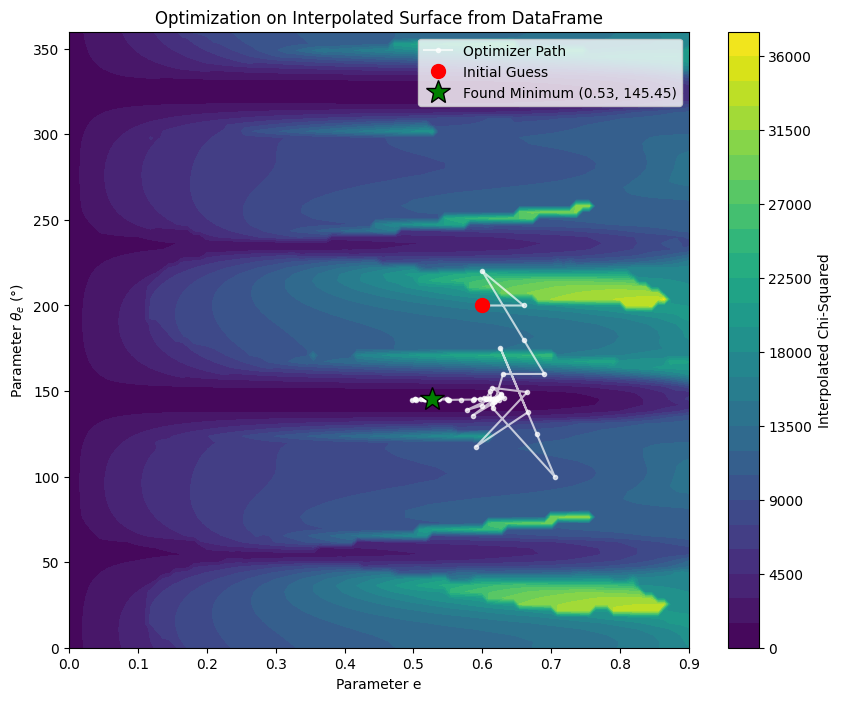

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# (Paste your nelder_mead_glafic_with_history function here)
# This function does not need any changes.
def nelder_mead_glafic_with_history(func, x0, y0, ftol=1e-4, nmax=10000, verbose=False):
    """
    Nelder-Mead simplex optimization matching glafic's implementation,
    with tracking of all evaluation points.
    ... (full code from your prompt) ...
    """
    # Simplex coefficients from glafic
    ALPHA = 1.0  # reflection coefficient
    BETA = 0.5   # contraction coefficient
    GAMMA = 2.0  # expansion coefficient

    n = 2  # number of dimensions

    # Initialize simplex: 3 vertices for 2D problem
    v = np.zeros((n + 1, n))
    f = np.zeros(n + 1)

    # Track all evaluations
    eval_history = []

    # Set initial simplex
    v[0] = [x0, y0]
    dx = 0.1 * abs(x0) if x0 != 0 else 0.1
    dy = 0.1 * abs(y0) if y0 != 0 else 0.1
    v[1] = [x0 + dx, y0]
    v[2] = [x0, y0 + dy]

    # Evaluate function at initial vertices and record
    for i in range(n + 1):
        f[i] = func(v[i][0], v[i][1])
        eval_history.append((v[i][0], v[i][1], f[i]))

    # Main optimization loop
    for itr in range(1, nmax + 1):
        # Handle cases where points are outside interpolation bounds (returning inf)
        f_finite_indices = np.where(np.isfinite(f))[0]
        if len(f_finite_indices) < 3:
            # Not enough valid points to form a simplex, try to shrink
            vs = np.argmin(f) # find the best point we have
            for i in range(n + 1):
                if i != vs:
                    v[i] = v[vs] + (v[i] - v[vs]) / 2.0
                    f[i] = func(v[i][0], v[i][1])
                    eval_history.append((v[i][0], v[i][1], f[i]))
            continue

        # Find indices of best, worst, and second-worst vertices among finite values
        f_temp_finite = f[f_finite_indices]
        vg_idx_finite = np.argmax(f_temp_finite)
        vs_idx_finite = np.argmin(f_temp_finite)
        
        vg = f_finite_indices[vg_idx_finite] # Index in the original f array
        vs = f_finite_indices[vs_idx_finite] # Index in the original f array

        f_temp = f.copy()
        f_temp[vg] = -np.inf
        vh = np.argmax(f_temp)

        # Calculate centroid of all points except worst
        vm = np.mean(v[[i for i in range(n + 1) if i != vg]], axis=0)

        # Reflection
        vr = vm + ALPHA * (vm - v[vg])
        fr = func(vr[0], vr[1])
        eval_history.append((vr[0], vr[1], fr))

        if np.isnan(fr): fr = np.inf

        if f[vs] <= fr < f[vh]:
            # Accept reflection
            v[vg], f[vg] = vr, fr
        elif fr < f[vs]:
            # Try expansion
            ve = vm + GAMMA * (vr - vm)
            fe = func(ve[0], ve[1])
            eval_history.append((ve[0], ve[1], fe))
            if np.isnan(fe): fe = np.inf
            
            if fe < fr:
                v[vg], f[vg] = ve, fe
            else:
                v[vg], f[vg] = vr, fr
        else:
            # Contraction
            if fr < f[vg]:
                vc = vm + BETA * (vr - vm) # Outside
            else:
                vc = vm - BETA * (vm - v[vg]) # Inside
            
            fc = func(vc[0], vc[1])
            eval_history.append((vc[0], vc[1], fc))
            if np.isnan(fc): fc = np.inf

            if fc < f[vg]:
                v[vg], f[vg] = vc, fc
            else:
                # Shrink toward best vertex
                for i in range(n + 1):
                    if i != vs:
                        v[i] = v[vs] + (v[i] - v[vs]) / 2.0
                        f[i] = func(v[i][0], v[i][1])
                        eval_history.append((v[i][0], v[i][1], f[i]))
        
        # Check convergence
        f_finite = f[np.isfinite(f)]
        if len(f_finite) < 2: continue
        max_f, min_f = np.max(f_finite), np.min(f_finite)
        
        rtol = 2.0 * abs(max_f - min_f) / (abs(max_f) + abs(min_f)) if (abs(max_f) + abs(min_f)) > 0 else 0.0
          
        if verbose:
            print(f"Iteration {itr}: f_min = {min_f:.6e}, rtol = {rtol:.6e}")
          
        if rtol < ftol:
            break
      
    vs = np.argmin(f)
    return v[vs][0], v[vs][1], f[vs], eval_history


# --- Main Application ---

# 1. LOAD YOUR DATA
# For demonstration, we create a sample DataFrame.
# !!! IN YOUR CODE, REPLACE THIS BLOCK WITH:
# !!! data = pd.read_csv('your_file.csv')


# 2. PREPARE DATA FOR INTERPOLATION
print("\nStep 2: Extracting data from DataFrame for interpolation...")
# Extract the parameter columns as a (N, 2) numpy array of points.
# It is crucial that the order of columns here ('e', '$θ_{e}$') matches
# the order of arguments (x, y) in the function the optimizer calls.
points = mask_data[['e', '$θ_{e}$']].values

# Extract the chi2 column as a (N,) numpy array of values.
values = mask_data['chi2'].values
print(f"Extracted {len(values)} points.")


# 3. CREATE THE INTERPOLATION FUNCTION
print("\nStep 3: Creating an interpolation function from the data...")
def create_interpolated_chi2_func_with_bounds(points, values):
    """
    Creates a callable function that interpolates chi2 values
    and enforces the physical constraint e >= 0.
    """
    def chi2_interpolator_with_bounds(e, theta_e):
        # --- CONSTRAINT CHECK ---
        # If ellipticity is negative, this is a forbidden state.
        # Return infinity to heavily penalize the optimizer.
        if e < 0:
            return np.inf

        # If the constraint is met, proceed with interpolation as before.
        chi2 = griddata(points, values, (e, theta_e), method='linear', fill_value=np.inf)
        return chi2
        
    return chi2_interpolator_with_bounds

interpolated_chi2 = create_interpolated_chi2_func_with_bounds(points, values)
print("Interpolator function created successfully.")


# 4. RUN THE OPTIMIZER
print("\nStep 4: Running Nelder-Mead optimizer on the interpolated surface...")
# It's good practice to start the search from a point within your data range
initial_e = 0.6
initial_theta_e = 200

e_min, theta_e_min, chi2_min, history = nelder_mead_glafic_with_history(
    interpolated_chi2,
    initial_e,
    initial_theta_e,
    verbose=True
)


# 5. PRINT RESULTS
print("\n--- Optimization Finished ---")
print(f"Initial Guess: (e={initial_e}, θe={initial_theta_e})")
print(f"Found Minimum Chi-squared (interpolated): {chi2_min:.6f}")
print(f"At Parameters: (e={e_min:.4f}, θe={theta_e_min:.4f})")
print(f"Total Interpolator Evaluations: {len(history)}")


# 6. VISUALIZE THE RESULT
print("\nStep 5: Visualizing the results...")
plt.figure(figsize=(10, 8))

# Create a grid for a smooth contour plot
e_grid = np.linspace(data['e'].min(), data['e'].max(), 100)
theta_e_grid = np.linspace(data['$θ_{e}$'].min(), data['$θ_{e}$'].max(), 100)
E_grid, THETA_grid = np.meshgrid(e_grid, theta_e_grid)

# Interpolate the chi2 values onto this grid for plotting
CHI2_grid = griddata(points, values, (E_grid, THETA_grid), method='cubic')

# Plot the contour
contour = plt.contourf(E_grid, THETA_grid, CHI2_grid, levels=30, cmap='viridis')
plt.colorbar(contour, label='Interpolated Chi-Squared')

# Overlay the path of the optimizer
hist_e = [p[0] for p in history]
hist_theta_e = [p[1] for p in history]
plt.plot(hist_e, hist_theta_e, 'w-o', markersize=3, alpha=0.7, label='Optimizer Path')

# Plot key points
plt.plot(initial_e, initial_theta_e, 'ro', markersize=10, label='Initial Guess')
plt.plot(e_min, theta_e_min, 'g*', markersize=18, markeredgecolor='k', label=f'Found Minimum ({e_min:.2f}, {theta_e_min:.2f})')

plt.xlabel('Parameter e')
# You can use LaTeX formatting in plot labels
plt.ylabel('Parameter $θ_{e}$ (°)')
plt.title('Optimization on Interpolated Surface from DataFrame')
plt.legend()
plt.show()


Step 2: Extracting data from DataFrame...

Step 3: Creating an interpolation function with parameter transformation...
Transforming interpolator created successfully.

Step 4: Running Nelder-Mead in transformed parameter space...
Physical guess (e=0.5) transformed to search space (e_log=-0.6931)
Iteration 1: e_phys=0.5000, f_min = 4.280023e+04, rtol = 8.370646e-01
Iteration 2: e_phys=0.5359, f_min = 2.877857e+04, rtol = 1.091539e+00
Iteration 3: e_phys=0.4830, f_min = 2.877857e+04, rtol = 3.917823e-01
Iteration 4: e_phys=0.4830, f_min = 2.877857e+04, rtol = 3.468101e-01
Iteration 5: e_phys=0.4830, f_min = 2.877857e+04, rtol = 1.087331e-01
Iteration 6: e_phys=0.4830, f_min = 2.457001e+04, rtol = 2.619136e-01
Iteration 7: e_phys=0.4352, f_min = 2.457001e+04, rtol = 1.577762e-01
Iteration 8: e_phys=0.4352, f_min = 1.870765e+04, rtol = 2.840509e-01
Iteration 9: e_phys=0.3428, f_min = 1.870765e+04, rtol = 2.709186e-01
Iteration 10: e_phys=0.3428, f_min = 1.371913e+04, rtol = 4.025954e-01
I

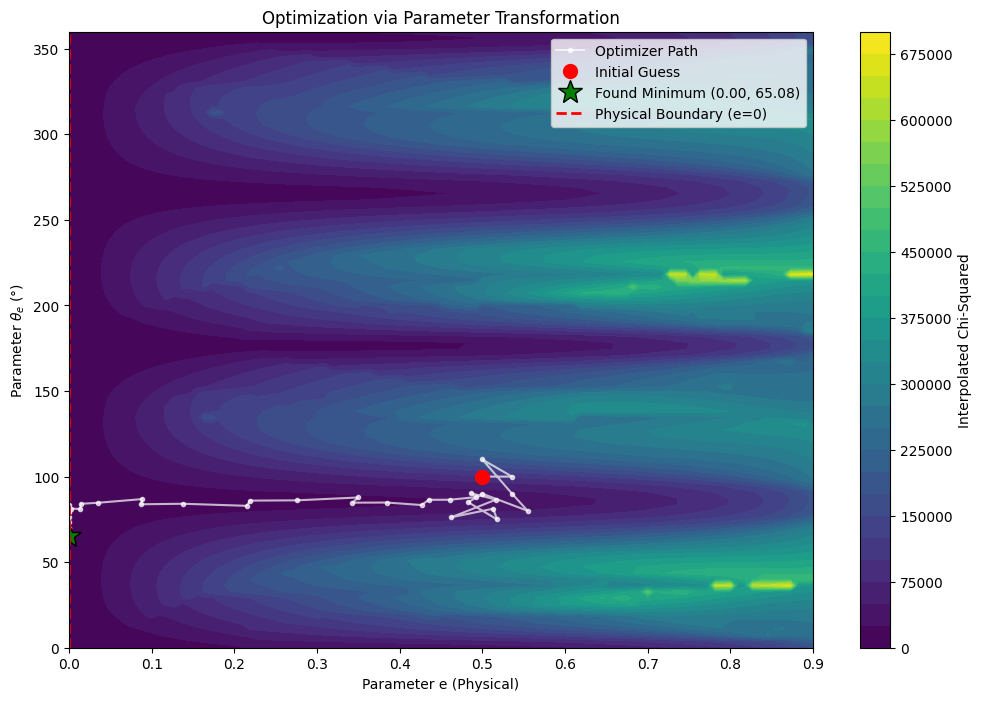

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# (Your nelder_mead_glafic_with_history function remains unchanged)
def nelder_mead_glafic_with_history(func, x0, y0, ftol=1e-4, nmax=10000, verbose=False):
    # --- THIS FUNCTION REQUIRES NO CHANGES ---
    # It will optimize whatever parameters it is given.
    # We are just changing what those parameters represent.
    """
    Nelder-Mead simplex optimization matching glafic's implementation...
    ... (full code from your prompt) ...
    """
    # Simplex coefficients from glafic
    ALPHA = 1.0; BETA = 0.5; GAMMA = 2.0
    n = 2; v = np.zeros((n + 1, n)); f = np.zeros(n + 1)
    eval_history = []
    v[0] = [x0, y0]
    dx = 0.1 * abs(x0) if x0 != 0 else 0.1
    dy = 0.1 * abs(y0) if y0 != 0 else 0.1
    v[1] = [x0 + dx, y0]; v[2] = [x0, y0 + dy]
    for i in range(n + 1):
        f[i] = func(v[i][0], v[i][1])
        eval_history.append((v[i][0], v[i][1], f[i]))
    for itr in range(1, nmax + 1):
        f_finite_indices = np.where(np.isfinite(f))[0]
        if len(f_finite_indices) < 3:
            vs = np.argmin(f)
            for i in range(n + 1):
                if i != vs:
                    v[i] = v[vs] + (v[i] - v[vs]) / 2.0; f[i] = func(v[i][0], v[i][1])
                    eval_history.append((v[i][0], v[i][1], f[i]))
            continue
        f_temp_finite = f[f_finite_indices]
        vg = f_finite_indices[np.argmax(f_temp_finite)]
        vs = f_finite_indices[np.argmin(f_temp_finite)]
        f_temp = f.copy(); f_temp[vg] = -np.inf; vh = np.argmax(f_temp)
        vm = np.mean(v[[i for i in range(n + 1) if i != vg]], axis=0)
        vr = vm + ALPHA * (vm - v[vg]); fr = func(vr[0], vr[1])
        eval_history.append((vr[0], vr[1], fr))
        if np.isnan(fr): fr = np.inf
        if f[vs] <= fr < f[vh]:
            v[vg], f[vg] = vr, fr
        elif fr < f[vs]:
            ve = vm + GAMMA * (vr - vm); fe = func(ve[0], ve[1])
            eval_history.append((ve[0], ve[1], fe))
            if np.isnan(fe): fe = np.inf
            if fe < fr: v[vg], f[vg] = ve, fe
            else: v[vg], f[vg] = vr, fr
        else:
            vc = vm + BETA * (vr - vm) if fr < f[vg] else vm - BETA * (vm - v[vg])
            fc = func(vc[0], vc[1])
            eval_history.append((vc[0], vc[1], fc))
            if np.isnan(fc): fc = np.inf
            if fc < f[vg]: v[vg], f[vg] = vc, fc
            else:
                for i in range(n + 1):
                    if i != vs:
                        v[i] = v[vs] + (v[i] - v[vs]) / 2.0; f[i] = func(v[i][0], v[i][1])
                        eval_history.append((v[i][0], v[i][1], f[i]))
        f_finite = f[np.isfinite(f)]
        if len(f_finite) < 2: continue
        max_f, min_f = np.max(f_finite), np.min(f_finite)
        rtol = 2.0 * abs(max_f - min_f) / (abs(max_f) + abs(min_f)) if (abs(max_f) + abs(min_f)) > 0 else 0.0
        if verbose:
            # For logging, we transform e_log back to e to see the physical value
            current_e_phys = np.exp(v[vs][0])
            print(f"Iteration {itr}: e_phys={current_e_phys:.4f}, f_min = {min_f:.6e}, rtol = {rtol:.6e}")
        if rtol < ftol: break
    vs = np.argmin(f)
    return v[vs][0], v[vs][1], f[vs], eval_history


# --- Main Application ---

# 2. PREPARE DATA FOR INTERPOLATION (Unchanged)
print("\nStep 2: Extracting data from DataFrame...")
points = mask_data[['e', '$θ_{e}$']].values
values = mask_data['chi2'].values

# 3. CREATE THE TRANSFORMING INTERPOLATION FUNCTION
print("\nStep 3: Creating an interpolation function with parameter transformation...")

def create_transformed_interpolator(points, values):
    """
    Creates a chi-squared function that the optimizer can call.
    This function expects a transformed parameter 'e_log' and transforms
    it back to physical 'e' before doing the interpolation.
    """
    def chi2_func(e_log, theta_e):
        # --- INVERT THE TRANSFORMATION ---
        # The optimizer gives us e_log, we turn it into physical e.
        # This guarantees e is always positive.
        e_physical = np.exp(e_log)

        # Now use the guaranteed-positive 'e' for interpolation.
        chi2 = griddata(points, values, (e_physical, theta_e), method='linear', fill_value=np.inf)
        return chi2
        
    return chi2_func

# Create the function to be passed to the optimizer
transformed_chi2_func = create_transformed_interpolator(points, values)
print("Transforming interpolator created successfully.")

# 4. RUN THE OPTIMIZER IN THE TRANSFORMED SPACE
print("\nStep 4: Running Nelder-Mead in transformed parameter space...")
# Define initial guess in the PHYSICAL space
initial_e_physical = 0.5
initial_theta_e = 100.0

# --- TRANSFORM THE INITIAL GUESS ---
# We must convert our physical guess for 'e' into the 'e_log' space
# that the optimizer will work in.
if initial_e_physical <= 0:
    raise ValueError("Initial guess for ellipticity 'e' must be positive for log transformation.")
initial_e_log = np.log(initial_e_physical)
print(f"Physical guess (e={initial_e_physical}) transformed to search space (e_log={initial_e_log:.4f})")

# Run the optimizer with the transformed guess and function
e_log_min, theta_e_min, chi2_min, history = nelder_mead_glafic_with_history(
    transformed_chi2_func,
    initial_e_log, # Pass the transformed guess
    initial_theta_e, # theta_e is not transformed
    verbose=True
)

# 5. TRANSFORM THE RESULT BACK AND PRINT
print("\n--- Optimization Finished ---")

# --- INVERT THE TRANSFORMATION ON THE FINAL RESULT ---
e_min_physical = np.exp(e_log_min)

print(f"Initial Physical Guess: (e={initial_e_physical}, θe={initial_theta_e})")
print(f"Found Minimum Chi-squared (interpolated): {chi2_min:.6f}")
print(f"At Search Parameters: (e_log={e_log_min:.4f}, θe={theta_e_min:.4f})")
print(f"At PHYSICAL Parameters: (e={e_min_physical:.4f}, θe={theta_e_min:.4f})")

# 6. VISUALIZE THE RESULT
print("\nStep 5: Visualizing the results...")
plt.figure(figsize=(12, 8))
# Create grid for plotting
e_grid = np.linspace(data['e'].min(), data['e'].max(), 100)
theta_e_grid = np.linspace(data['$θ_{e}$'].min(), data['$θ_{e}$'].max(), 100)
E_grid, THETA_grid = np.meshgrid(e_grid, theta_e_grid)
CHI2_grid = griddata(points, values, (E_grid, THETA_grid), method='cubic')
# Plot contours
contour = plt.contourf(E_grid, THETA_grid, CHI2_grid, levels=30, cmap='viridis')
plt.colorbar(contour, label='Interpolated Chi-Squared')

# --- TRANSFORM HISTORY FOR PLOTTING ---
# The history is in (e_log, theta_e), so we must convert it back for the plot.
hist_e_physical = [np.exp(p[0]) for p in history]
hist_theta_e = [p[1] for p in history]
plt.plot(hist_e_physical, hist_theta_e, 'w-o', markersize=3, alpha=0.7, label='Optimizer Path')

# Plot key points in physical space
plt.plot(initial_e_physical, initial_theta_e, 'ro', markersize=10, label='Initial Guess')
plt.plot(e_min_physical, theta_e_min, 'g*', markersize=18, markeredgecolor='k', label=f'Found Minimum ({e_min_physical:.2f}, {theta_e_min:.2f})')

plt.axvline(0, color='red', linestyle='--', linewidth=2, label='Physical Boundary (e=0)')
plt.xlabel('Parameter e (Physical)')
plt.ylabel('Parameter $θ_{e}$ (°)')
plt.title('Optimization via Parameter Transformation')
plt.legend()
plt.show()

In [96]:
frames_dir = f'frames_contour_melder-meade'
if os.path.exists(frames_dir):
    shutil.rmtree(frames_dir) # Clean up previous frames
os.makedirs(frames_dir)

# Create a grid of x and y values
x = mask_data['e'].values
y = mask_data['$θ_{e}$'].values
z = mask_data['chi2'].values

# Remove NaN values
mask = ~np.isnan(z)
x = x[mask]
y = y[mask]
z = z[mask]

# Create interpolation grid
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate z values on regular grid
zi = griddata((x, y), z, (xi, yi), method='cubic')


# Determine the global range for the z-variable to keep the color bar consistent
z_min = z.min()
z_max = z.max()

# Keep track of the path taken by the optimizer
path_e = []
path_theta_e = []

frame_files = []

# Iterate through the history of the optimizer to create frames
for i, (e_step, theta_e_step, chi2_step) in enumerate(history):
    e_step = (e_step)
    path_e.append(e_step)
    path_theta_e.append(theta_e_step)
    
    # Create the plot
    plt.figure(figsize=(12, 8))
    
    # Plot the contour using the pre-calculated grid
    contour = plt.contourf(xi, yi, zi, levels=100, cmap='rainbow', vmin=z_min, vmax=z_max)
    plt.colorbar(contour, label='Chi-squared')
    
    # Overlay the path of the optimizer up to the current step
    plt.plot(path_e, path_theta_e, 'k-o', markersize=4, alpha=0.8, label='Optimizer Path')
    
    # Highlight the current position
    plt.plot(e_step, theta_e_step, 'go', markersize=10, markeredgecolor='k', label='Current Position')
    
    # Plot the starting point
    plt.plot(initial_e, initial_theta_e, 'ro', markersize=10, label='Initial Guess')

    # Set labels and title
    plt.xlabel('e')
    plt.ylabel('$θ_{e}$')
    plt.title(f'Nelder-Mead Optimization: Step {i+1}/{len(history)}')
    plt.legend()
    plt.grid(True, alpha=0.2)
    plt.tight_layout()

    # Save the frame
    frame_path = os.path.join(frames_dir, f"frame_{i:04d}.png")
    plt.savefig(frame_path)
    plt.close()  # Close the plot to free memory
    frame_files.append(frame_path)

# Create the video from the frames
if frame_files:
    # Use moviepy which was imported in cell 0
    clip = mp.ImageSequenceClip(frame_files, fps=10)
    video_filename = 'pow_sys2_nelder_mead_optimization_animation.mov'
    clip.write_videofile(video_filename, codec='libx264')
    print(f"Video saved as {video_filename}")

    # Clean up the frames directory
    shutil.rmtree(frames_dir)
else:
    print("No frames were generated to create a video.")

MoviePy - Building video pow_sys2_nelder_mead_optimization_animation.mov.
MoviePy - Writing video pow_sys2_nelder_mead_optimization_animation.mov



MoviePy - Done !
MoviePy - video ready pow_sys2_nelder_mead_optimization_animation.mov
Video saved as pow_sys2_nelder_mead_optimization_animation.mov


In [ ]:
# Create a grid of x and y values
x = mask_data['e'].values
y = mask_data['$θ_{e}$'].values
z = mask_data['chi2'].values

# Remove NaN values
mask = ~np.isnan(z)
x = x[mask]
y = y[mask]
z = z[mask]

# Create interpolation grid
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate z values on regular grid
zi = griddata((x, y), z, (xi, yi), method='cubic')


# Determine the global range for the z-variable to keep the color bar consistent
z_min = z.min()
z_max = z.max()


for num in range(10):
    frames_dir = f'frames_contour_melder-meade'
    if os.path.exists(frames_dir):
        shutil.rmtree(frames_dir) # Clean up previous frames
    os.makedirs(frames_dir)
    initial_e = np.random.uniform(0.1, 0.9)
    initial_theta_e = np.random.uniform(0, 360)

    e_min, theta_e_min, chi2_min, history = nelder_mead_glafic_with_history(
        interpolated_chi2,
        initial_e,
        initial_theta_e,
        verbose=True)
    
    # Keep track of the path taken by the optimizer
    path_e = []
    path_theta_e = []

    frame_files = []

    # Iterate through the history of the optimizer to create frames
    for i, (e_step, theta_e_step, chi2_step) in enumerate(history):
        e_step = (e_step)
        path_e.append(e_step)
        path_theta_e.append(theta_e_step)
        
        # Create the plot
        plt.figure(figsize=(12, 8))
        
        # Plot the contour using the pre-calculated grid
        contour = plt.contourf(xi, yi, zi, levels=100, cmap='rainbow', vmin=z_min, vmax=z_max)
        plt.colorbar(contour, label='Chi-squared')
        
        # Overlay the path of the optimizer up to the current step
        plt.plot(path_e, path_theta_e, 'k-o', markersize=4, alpha=0.8, label='Optimizer Path')
        
        # Highlight the current position
        plt.plot(e_step, theta_e_step, 'go', markersize=10, markeredgecolor='k', label='Current Position')
        
        # Plot the starting point
        plt.plot(initial_e, initial_theta_e, 'ro', markersize=10, label='Initial Guess')

        # Set labels and title
        plt.xlabel('e')
        plt.ylabel('$θ_{e}$')
        plt.title(f'Nelder-Mead Optimization: Step {i+1}/{len(history)}')
        plt.legend()
        plt.grid(True, alpha=0.2)
        plt.tight_layout()

        # Save the frame
        frame_path = os.path.join(frames_dir, f"frame_{i:04d}.png")
        plt.savefig(frame_path)
        plt.close()  # Close the plot to free memory
        frame_files.append(frame_path)

    # Create the video from the frames
    if frame_files:
        # Use moviepy which was imported in cell 0
        clip = mp.ImageSequenceClip(frame_files, fps=10)
        video_filename = f'pow_{num}_nelder_mead_animation.mov'
        clip.write_videofile(video_filename, codec='libx264')
        print(f"Video saved as {video_filename}")

        # Clean up the frames directory
        shutil.rmtree(frames_dir)
    else:
        print("No frames were generated to create a video.")

Iteration 1: f_min = 3.239745e+03, rtol = 1.545733e+00
Iteration 2: f_min = 3.239745e+03, rtol = 1.431827e+00
Iteration 3: f_min = 1.240430e+03, rtol = 1.734223e+00
Iteration 4: f_min = 1.240430e+03, rtol = 1.384788e+00
Iteration 5: f_min = 1.240430e+03, rtol = 8.925168e-01
Iteration 6: f_min = 1.240430e+03, rtol = 7.406817e-01
Iteration 7: f_min = 1.240430e+03, rtol = 1.935662e-01
Iteration 8: f_min = 1.240430e+03, rtol = 1.682073e-01
Iteration 9: f_min = 1.010056e+03, rtol = 2.077748e-01
Iteration 10: f_min = 8.924811e+02, rtol = 3.262663e-01
Iteration 11: f_min = 8.924811e+02, rtol = 1.235979e-01
Iteration 12: f_min = 7.574503e+02, rtol = 2.469861e-01
Iteration 13: f_min = 7.574503e+02, rtol = 1.694989e-01
Iteration 14: f_min = 7.574503e+02, rtol = 1.636805e-01
Iteration 15: f_min = 7.574503e+02, rtol = 1.010749e-01
Iteration 16: f_min = 7.574503e+02, rtol = 8.315171e-02
Iteration 17: f_min = 7.406660e+02, rtol = 8.870541e-02
Iteration 18: f_min = 7.406660e+02, rtol = 3.854369e-02
I

MoviePy - Done !
MoviePy - video ready pow_0_nelder_mead_animation.mov
Video saved as pow_0_nelder_mead_animation.mov
Iteration 1: f_min = 9.938847e+03, rtol = 9.120400e-01
Iteration 2: f_min = 9.195060e+03, rtol = 8.168396e-01
Iteration 3: f_min = 8.007175e+03, rtol = 2.152758e-01
Iteration 4: f_min = 8.468365e+02, rtol = 1.662679e+00
Iteration 5: f_min = 8.086660e+02, rtol = 1.633085e+00
Iteration 6: f_min = 8.086660e+02, rtol = 1.262428e+00
Iteration 7: f_min = 8.086660e+02, rtol = 7.538355e-01
Iteration 8: f_min = 8.086660e+02, rtol = 2.773151e-01
Iteration 9: f_min = 6.945010e+02, rtol = 1.976665e-01
Iteration 10: f_min = 6.540453e+02, rtol = 2.114166e-01
Iteration 11: f_min = 6.540453e+02, rtol = 5.999907e-02
Iteration 12: f_min = 6.419026e+02, rtol = 5.463171e-02
Iteration 13: f_min = 6.212695e+02, rtol = 5.140032e-02
Iteration 14: f_min = 5.990944e+02, rtol = 6.899005e-02
Iteration 15: f_min = 5.773196e+02, rtol = 7.333604e-02
Iteration 16: f_min = 5.491284e+02, rtol = 8.703185

MoviePy - Done !
MoviePy - video ready pow_1_nelder_mead_animation.mov
Video saved as pow_1_nelder_mead_animation.mov
Iteration 1: f_min = 5.504061e+02, rtol = 1.623915e+00
Iteration 2: f_min = 5.504061e+02, rtol = 7.231066e-01
Iteration 3: f_min = 4.742664e+02, rtol = 1.543748e-01
Iteration 4: f_min = 4.742664e+02, rtol = 1.486127e-01
Iteration 5: f_min = 1.333243e+02, rtol = 1.127680e+00
Iteration 6: f_min = 1.173172e+02, rtol = 1.206758e+00
Iteration 7: f_min = 1.173172e+02, rtol = 8.738470e-01
Iteration 8: f_min = 1.173172e+02, rtol = 1.631942e-01
Iteration 9: f_min = 8.100167e+01, rtol = 4.882531e-01
Iteration 10: f_min = 6.589714e+01, rtol = 5.613104e-01
Iteration 11: f_min = 6.589714e+01, rtol = 3.635849e-01
Iteration 12: f_min = 6.589714e+01, rtol = 2.428376e-01
Iteration 13: f_min = 6.589714e+01, rtol = 2.056453e-01
Iteration 14: f_min = 6.540989e+01, rtol = 1.832437e-01
Iteration 15: f_min = 5.413476e+01, rtol = 1.959876e-01
Iteration 16: f_min = 4.218604e+01, rtol = 4.316865

MoviePy - Done !
MoviePy - video ready pow_2_nelder_mead_animation.mov
Video saved as pow_2_nelder_mead_animation.mov
Iteration 3: f_min = 8.542219e+04, rtol = 3.457358e-02
Iteration 4: f_min = 8.542219e+04, rtol = 2.102104e-02
Iteration 5: f_min = 8.542219e+04, rtol = 1.421248e-02
Iteration 6: f_min = 8.542219e+04, rtol = 1.404941e-02
Iteration 7: f_min = 8.412209e+04, rtol = 2.612593e-02
Iteration 8: f_min = 8.121571e+04, rtol = 5.048647e-02
Iteration 9: f_min = 7.526100e+04, rtol = 1.111923e-01
Iteration 10: f_min = 6.407035e+04, rtol = 2.360220e-01
Iteration 11: f_min = 4.494098e+04, rtol = 5.044847e-01
Iteration 12: f_min = 9.434511e+03, rtol = 1.486591e+00
Iteration 13: f_min = 9.434511e+03, rtol = 1.363274e+00
Iteration 14: f_min = 7.518206e+03, rtol = 1.426739e+00
Iteration 15: f_min = 7.518206e+03, rtol = 1.051214e+00
Iteration 16: f_min = 7.518206e+03, rtol = 7.286333e-01
Iteration 17: f_min = 1.308430e+03, rtol = 1.512822e+00
Iteration 18: f_min = 1.308430e+03, rtol = 1.4070

MoviePy - Done !
MoviePy - video ready pow_3_nelder_mead_animation.mov
Video saved as pow_3_nelder_mead_animation.mov
Iteration 1: f_min = 5.338858e+03, rtol = 1.328735e+00
Iteration 2: f_min = 6.944766e+02, rtol = 1.552414e+00
Iteration 3: f_min = 6.309704e+02, rtol = 1.577227e+00
Iteration 4: f_min = 6.309704e+02, rtol = 8.257258e-01
Iteration 5: f_min = 3.290379e+02, rtol = 7.140862e-01
Iteration 6: f_min = 2.838966e+02, rtol = 7.587415e-01
Iteration 7: f_min = 2.753122e+02, rtol = 1.777965e-01
Iteration 8: f_min = 2.472746e+02, rtol = 1.378917e-01
Iteration 9: f_min = 8.241603e+01, rtol = 1.078451e+00
Iteration 10: f_min = 6.988515e+01, rtol = 1.118612e+00
Iteration 11: f_min = 6.988515e+01, rtol = 7.857676e-01
Iteration 12: f_min = 6.101487e+01, rtol = 2.984177e-01
Iteration 13: f_min = 5.934039e+01, rtol = 1.631995e-01
Iteration 14: f_min = 4.855443e+01, rtol = 2.274440e-01
Iteration 15: f_min = 4.855443e+01, rtol = 1.999347e-01
Iteration 16: f_min = 4.250510e+01, rtol = 2.775792

MoviePy - Done !
MoviePy - video ready pow_4_nelder_mead_animation.mov
Video saved as pow_4_nelder_mead_animation.mov
Iteration 1: f_min = 1.318372e+04, rtol = 2.696490e-01
Iteration 2: f_min = 1.203052e+04, rtol = 2.558192e-01
Iteration 3: f_min = 1.825971e+03, rtol = 1.513389e+00
Iteration 4: f_min = 1.738527e+03, rtol = 1.494946e+00
Iteration 5: f_min = 1.738527e+03, rtol = 7.705839e-01
Iteration 6: f_min = 1.404155e+03, rtol = 2.611759e-01
Iteration 7: f_min = 1.347405e+03, rtol = 2.534871e-01
Iteration 8: f_min = 6.978495e+02, rtol = 6.720305e-01
Iteration 9: f_min = 6.652302e+02, rtol = 6.778923e-01
Iteration 10: f_min = 6.652302e+02, rtol = 3.874460e-01
Iteration 11: f_min = 6.652302e+02, rtol = 1.831717e-01
Iteration 12: f_min = 6.652302e+02, rtol = 6.031442e-02
Iteration 13: f_min = 6.602180e+02, rtol = 5.541932e-02
Iteration 14: f_min = 6.279089e+02, rtol = 5.772208e-02
Iteration 15: f_min = 6.236128e+02, rtol = 5.702486e-02
Iteration 16: f_min = 5.617688e+02, rtol = 1.111898

MoviePy - Done !
MoviePy - video ready pow_5_nelder_mead_animation.mov
Video saved as pow_5_nelder_mead_animation.mov
Iteration 1: f_min = 2.112144e+03, rtol = 1.866025e+00
Iteration 2: f_min = 2.112144e+03, rtol = 1.805068e+00
Iteration 3: f_min = 2.112144e+03, rtol = 1.013548e+00
Iteration 4: f_min = 2.112144e+03, rtol = 3.004132e-01
Iteration 5: f_min = 1.719753e+03, rtol = 3.056373e-01
Iteration 6: f_min = 1.500323e+03, rtol = 3.387270e-01
Iteration 7: f_min = 1.500323e+03, rtol = 1.580856e-01
Iteration 8: f_min = 1.500323e+03, rtol = 1.362884e-01
Iteration 9: f_min = 1.339334e+03, rtol = 1.653282e-01
Iteration 10: f_min = 9.606424e+02, rtol = 4.385929e-01
Iteration 11: f_min = 9.606424e+02, rtol = 3.293003e-01
Iteration 12: f_min = 4.402930e+02, rtol = 7.748837e-01
Iteration 13: f_min = 4.402930e+02, rtol = 7.428600e-01
Iteration 14: f_min = 4.402930e+02, rtol = 6.087025e-01
Iteration 15: f_min = 4.402930e+02, rtol = 5.524210e-01
Iteration 16: f_min = 4.402930e+02, rtol = 4.959047

MoviePy - Done !
MoviePy - video ready pow_6_nelder_mead_animation.mov
Video saved as pow_6_nelder_mead_animation.mov
Iteration 3: f_min = 3.943727e+04, rtol = 1.599252e-01
Iteration 4: f_min = 3.943727e+04, rtol = 1.493329e-01
Iteration 5: f_min = 3.460367e+04, rtol = 2.420208e-01
Iteration 6: f_min = 3.460367e+04, rtol = 1.590030e-01
Iteration 7: f_min = 3.327401e+04, rtol = 1.695268e-01
Iteration 8: f_min = 2.550102e+04, rtol = 3.028932e-01
Iteration 9: f_min = 2.550102e+04, rtol = 2.644997e-01
Iteration 10: f_min = 2.170705e+04, rtol = 3.630747e-01
Iteration 11: f_min = 1.543512e+04, rtol = 4.917855e-01
Iteration 12: f_min = 1.180279e+04, rtol = 5.911259e-01
Iteration 13: f_min = 4.849362e+03, rtol = 1.043730e+00
Iteration 14: f_min = 4.849362e+03, rtol = 9.364412e-01
Iteration 15: f_min = 2.400768e+03, rtol = 1.323897e+00
Iteration 16: f_min = 2.400768e+03, rtol = 1.059769e+00
Iteration 17: f_min = 2.400768e+03, rtol = 7.937159e-01
Iteration 18: f_min = 1.910146e+03, rtol = 8.6965

MoviePy - Done !
MoviePy - video ready pow_7_nelder_mead_animation.mov
Video saved as pow_7_nelder_mead_animation.mov
Iteration 1: f_min = 5.936224e+04, rtol = 4.649916e-01
Iteration 2: f_min = 5.977556e+03, rtol = 1.634215e+00
Iteration 3: f_min = 5.977556e+03, rtol = 1.634063e+00
Iteration 4: f_min = 5.977556e+03, rtol = 1.171646e+00
Iteration 5: f_min = 5.977556e+03, rtol = 8.405622e-01
Iteration 6: f_min = 7.023508e+02, rtol = 1.590724e+00
Iteration 7: f_min = 5.291432e+02, rtol = 1.674709e+00
Iteration 8: f_min = 5.291432e+02, rtol = 1.192960e+00
Iteration 9: f_min = 5.291432e+02, rtol = 5.215510e-01
Iteration 10: f_min = 5.291432e+02, rtol = 3.493893e-01
Iteration 11: f_min = 4.563048e+02, rtol = 4.247095e-01
Iteration 12: f_min = 3.390292e+02, rtol = 4.379636e-01
Iteration 13: f_min = 3.390292e+02, rtol = 3.002038e-01
Iteration 14: f_min = 3.390292e+02, rtol = 2.949090e-01
Iteration 15: f_min = 3.197599e+02, rtol = 2.793843e-01
Iteration 16: f_min = 2.761212e+02, rtol = 2.045291

MoviePy - Done !
MoviePy - video ready pow_8_nelder_mead_animation.mov
Video saved as pow_8_nelder_mead_animation.mov
Iteration 1: f_min = 3.910481e+03, rtol = 1.382539e+00
Iteration 2: f_min = 3.121997e+03, rtol = 1.073581e+00
Iteration 3: f_min = 2.880479e+03, rtol = 3.033451e-01
Iteration 4: f_min = 2.961385e+02, rtol = 1.653450e+00
Iteration 5: f_min = 2.961385e+02, rtol = 1.627102e+00
Iteration 6: f_min = 2.961385e+02, rtol = 1.028148e+00
Iteration 7: f_min = 2.961385e+02, rtol = 5.892526e-01
Iteration 8: f_min = 2.961385e+02, rtol = 2.833415e-01
Iteration 9: f_min = 2.961385e+02, rtol = 1.871499e-01
Iteration 10: f_min = 2.855028e+02, rtol = 2.225788e-01
Iteration 11: f_min = 2.522324e+02, rtol = 1.601327e-01
Iteration 12: f_min = 2.383783e+02, rtol = 1.799054e-01
Iteration 13: f_min = 2.044602e+02, rtol = 2.092095e-01
Iteration 14: f_min = 1.883323e+02, rtol = 2.345665e-01
Iteration 15: f_min = 1.883323e+02, rtol = 1.112860e-01
Iteration 16: f_min = 1.883323e+02, rtol = 8.211937

MoviePy - Done !
MoviePy - video ready pow_9_nelder_mead_animation.mov
Video saved as pow_9_nelder_mead_animation.mov


In [81]:
# Create a grid of x and y values
x = mask_data['e'].values
y = mask_data['$θ_{e}$'].values
z = mask_data['chi2'].values

# Remove NaN values
mask = ~np.isnan(z)
x = x[mask]
y = y[mask]
z = z[mask]

# Create interpolation grid
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate z values on regular grid
zi = griddata((x, y), z, (xi, yi), method='cubic')


# Determine the global range for the z-variable to keep the color bar consistent
z_min = z.min()
z_max = z.max()

points = []

for num in tqdm.tqdm(range(100), desc="Running Nelder-Mead"):
    # It's more efficient to create the frames directory once if needed, 
    # but this loop's main purpose is collecting points, not creating frames.
    # The frame-related code from the original snippet is removed to avoid side-effects.
    
    initial_e = np.random.uniform(0.5, 0.9)
    initial_theta_e = np.random.uniform(0, 360)

    # Run the optimizer. Set verbose=False to keep the tqdm progress bar clean.
    e_min, theta_e_min, chi2_min, history = nelder_mead_glafic_with_history(
        interpolated_chi2,
        initial_e,
        initial_theta_e,
        verbose=False)
    
    # Store the initial and final points
    points.append((initial_e, initial_theta_e, e_min, theta_e_min))
    

Running Nelder-Mead: 100%|██████████| 100/100 [13:19<00:00,  7.99s/it]


In [82]:
initial_e_list = [p[0] for p in points]
initial_theta_e_list = [p[1] for p in points]
final_e_list = [p[2] for p in points]
final_theta_e_list = [p[3] for p in points]


In [86]:
# The source points for interpolation are the 'e' and 'θ_e' columns from mask_data
source_points = mask_data[['e', '$θ_{e}$']].values

# The values at those source points are from the 'chi2' column
source_values = mask_data['chi2'].values

# The points where we want to interpolate are the final e and theta_e values.
# They need to be stacked into a (N, 2) array.
final_points = np.column_stack((final_e_list, final_theta_e_list))

# Call griddata with the correct arguments
chi2_at_final_points = griddata(source_points, source_values, final_points, method='linear', fill_value=np.inf)

print(chi2_at_final_points)

[ 169.02300433  169.04755444 1045.51543361 1045.50444904 1045.51413771
 1045.51192202 1045.50365203  169.04406371 1045.5114964  1045.56710989
  169.04716071 1045.5213547   169.06547631 1045.50689859 1045.50604579
  169.05828471  166.40374274  169.02109337 1045.52565785 1045.50475425
 1045.51257282  169.03522836  166.40782797 1045.50478919  169.01936671
 1045.5446472   169.07423209 1045.5490075   169.02098354  169.03062849
 1045.55952427 1045.51632285 1045.5679936   166.43480055  166.41537828
  169.0638797  1045.57475866  169.10138437  166.43926581 1045.503
  170.67237902  166.52461346 1045.5401054  1045.50645797  166.39974392
  166.45503542  169.02333492  169.06233024  169.02194815  169.08722011
  169.02809435 1045.53891268 1045.503       169.06267598  166.41695567
 1045.58025694  166.44521566  166.40709539 1045.50885046  166.43284034
  169.01930895 1045.50491593 1045.53266703 1045.55737551 1045.56466293
 1045.52871518  169.02120528  166.40008635 1045.58270206  166.40556361
  166.39631

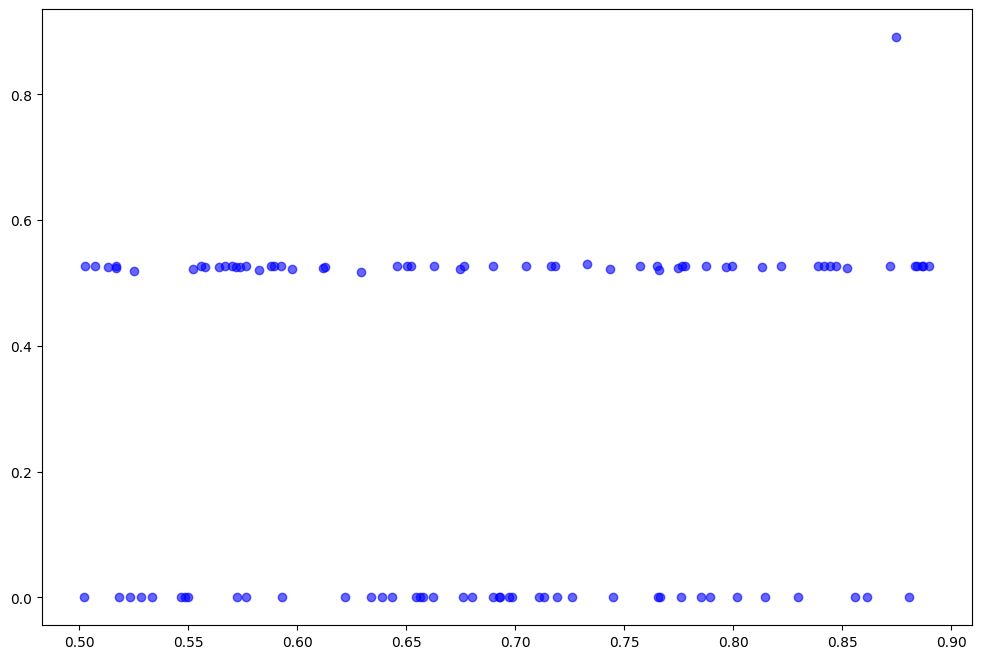

In [87]:
plt.figure(figsize=(12, 8))
plt.scatter(initial_e_list, final_e_list, c='blue', label='Initial e vs Final e', alpha=0.6)

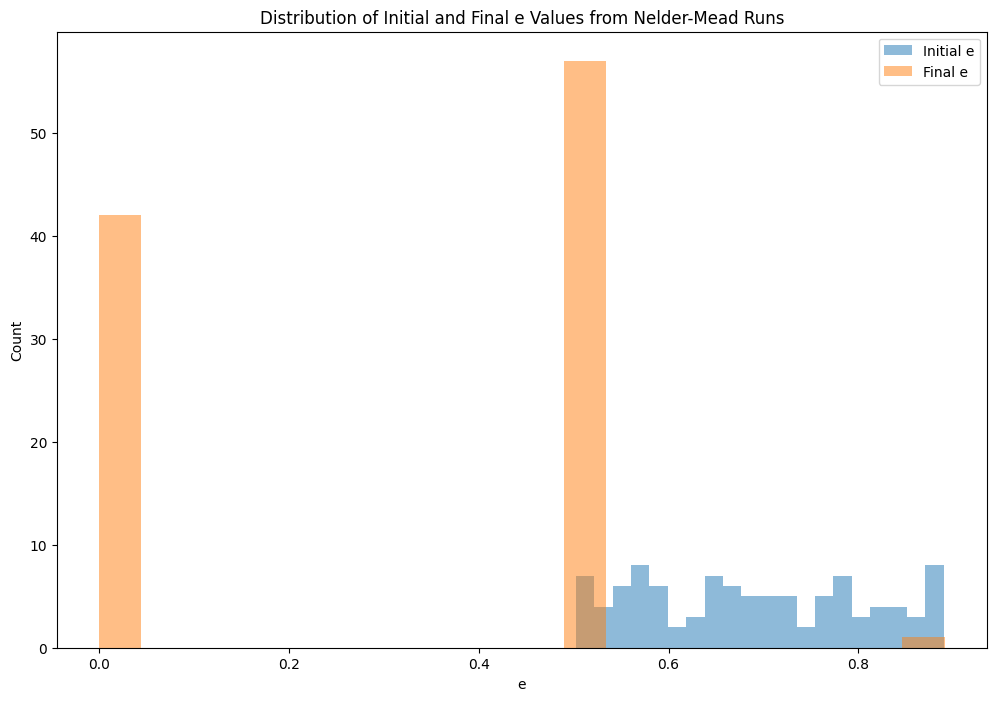

In [83]:
plt.figure(figsize=(12, 8))
plt.hist(initial_e_list, bins=20, alpha=0.5, label='Initial e')
plt.hist(final_e_list, bins=20, alpha=0.5, label='Final e')
plt.xlabel('e')
plt.ylabel('Count')
plt.title('Distribution of Initial and Final e Values from Nelder-Mead Runs')
plt.legend()
plt.show()

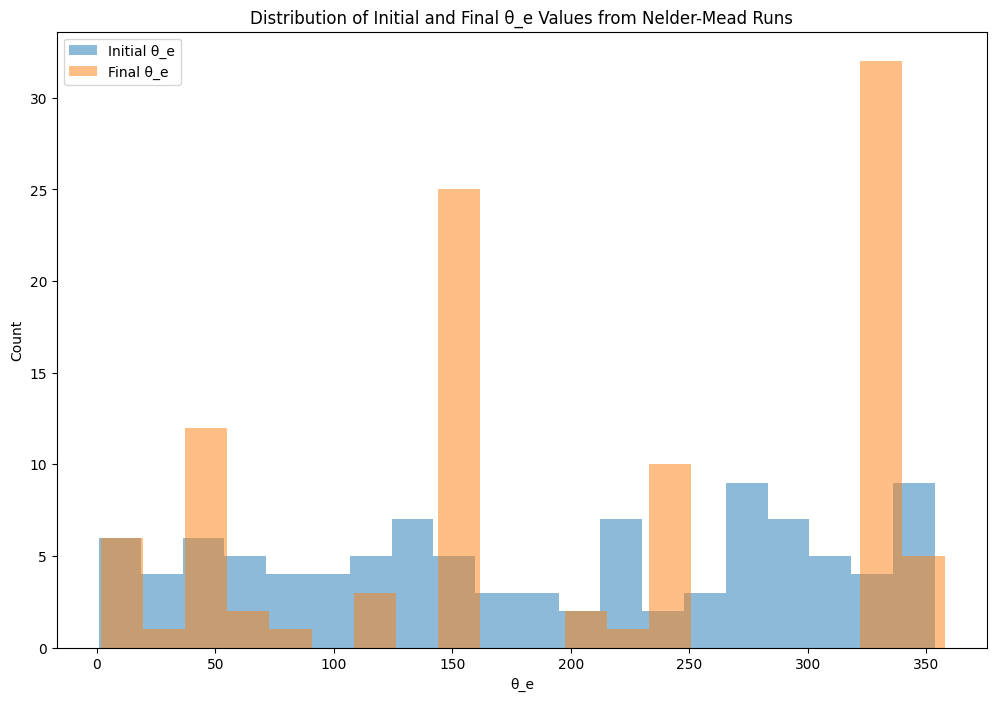

In [84]:
plt.figure(figsize=(12, 8))
plt.hist(initial_theta_e_list, bins=20, alpha=0.5, label='Initial θ_e')
plt.hist(final_theta_e_list, bins=20, alpha=0.5, label='Final θ_e')
plt.xlabel('θ_e')
plt.ylabel('Count')
plt.title('Distribution of Initial and Final θ_e Values from Nelder-Mead Runs')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D # Required for 3D plotting

# --- Nelder-Mead Optimizer Modified for 3 Parameters ---
def nelder_mead_glafic_with_history(func, x0, y0, z0, ftol=1e-4, nmax=10000, verbose=False):
    """
    Nelder-Mead simplex optimization for 3 parameters, with tracking of all evaluation points.
    """
    # Simplex coefficients
    ALPHA = 1.0  # reflection coefficient
    BETA = 0.5   # contraction coefficient
    GAMMA = 2.0  # expansion coefficient

    n = 3  # number of dimensions

    # Initialize simplex: 4 vertices for a 3D problem
    v = np.zeros((n + 1, n))
    f = np.zeros(n + 1)

    # Track all evaluations
    eval_history = []

    # Set initial simplex
    v[0] = [x0, y0, z0]
    dx = 0.1 * abs(x0) if x0 != 0 else 0.1
    dy = 0.1 * abs(y0) if y0 != 0 else 0.1
    dz = 0.1 * abs(z0) if z0 != 0 else 0.1
    v[1] = [x0 + dx, y0, z0]
    v[2] = [x0, y0 + dy, z0]
    v[3] = [x0, y0, z0 + dz]


    # Evaluate function at initial vertices and record
    for i in range(n + 1):
        f[i] = func(v[i][0], v[i][1], v[i][2])
        eval_history.append((v[i][0], v[i][1], v[i][2], f[i]))

    # Main optimization loop
    for itr in range(1, nmax + 1):
        f_finite_indices = np.where(np.isfinite(f))[0]
        if len(f_finite_indices) < n + 1:
            vs = np.argmin(f)
            for i in range(n + 1):
                if i != vs:
                    v[i] = v[vs] + (v[i] - v[vs]) / 2.0
                    f[i] = func(v[i][0], v[i][1], v[i][2])
                    eval_history.append((v[i][0], v[i][1], v[i][2], f[i]))
            continue

        f_temp_finite = f[f_finite_indices]
        vg_idx_finite = np.argmax(f_temp_finite)
        vs_idx_finite = np.argmin(f_temp_finite)
        
        vg = f_finite_indices[vg_idx_finite]
        vs = f_finite_indices[vs_idx_finite]

        f_temp = f.copy()
        f_temp[vg] = -np.inf
        vh = np.argmax(f_temp)

        vm = np.mean(v[[i for i in range(n + 1) if i != vg]], axis=0)

        vr = vm + ALPHA * (vm - v[vg])
        fr = func(vr[0], vr[1], vr[2])
        eval_history.append((vr[0], vr[1], vr[2], fr))
        if np.isnan(fr): fr = np.inf

        if f[vs] <= fr < f[vh]:
            v[vg], f[vg] = vr, fr
        elif fr < f[vs]:
            ve = vm + GAMMA * (vr - vm)
            fe = func(ve[0], ve[1], ve[2])
            eval_history.append((ve[0], ve[1], ve[2], fe))
            if np.isnan(fe): fe = np.inf
            
            if fe < fr:
                v[vg], f[vg] = ve, fe
            else:
                v[vg], f[vg] = vr, fr
        else:
            if fr < f[vg]:
                vc = vm + BETA * (vr - vm)
            else:
                vc = vm - BETA * (vm - v[vg])
            
            fc = func(vc[0], vc[1], vc[2])
            eval_history.append((vc[0], vc[1], vc[2], fc))
            if np.isnan(fc): fc = np.inf

            if fc < f[vg]:
                v[vg], f[vg] = vc, fc
            else:
                for i in range(n + 1):
                    if i != vs:
                        v[i] = v[vs] + (v[i] - v[vs]) / 2.0
                        f[i] = func(v[i][0], v[i][1], v[i][2])
                        eval_history.append((v[i][0], v[i][1], v[i][2], f[i]))
        
        f_finite = f[np.isfinite(f)]
        if len(f_finite) < 2: continue
        max_f, min_f = np.max(f_finite), np.min(f_finite)
        
        rtol = 2.0 * abs(max_f - min_f) / (abs(max_f) + abs(min_f)) if (abs(max_f) + abs(min_f)) > 0 else 0.0
          
        if verbose:
            print(f"Iteration {itr}: f_min = {min_f:.6e}, rtol = {rtol:.6e}")
          
        if rtol < ftol:
            break
      
    vs = np.argmin(f)
    return v[vs][0], v[vs][1], v[vs][2], f[vs], eval_history


# --- Main Application ---


# 2. PREPARE DATA FOR INTERPOLATION
print("\nStep 2: Extracting data from DataFrame for interpolation...")
# It is crucial that the order of columns here matches the order of arguments (x, y, z)
# in the function the optimizer calls.
points = data[['e', '$θ_{e}$', '$\\sigma$']].values

# Extract the chi2 column as a (N,) numpy array of values.
values = data['chi2'].values
print(f"Extracted {len(values)} points for 3D interpolation.")


# 3. CREATE THE INTERPOLATION FUNCTION
print("\nStep 3: Creating a 3D interpolation function from the data...")
def create_interpolated_chi2_func_with_bounds(points, values):
    """
    Creates a callable function that interpolates chi2 values in 3D
    and enforces the physical constraint e >= 0.
    """
    def chi2_interpolator_with_bounds(e, theta_e, phi):
        # --- CONSTRAINT CHECK ---
        # If ellipticity is negative, return infinity to penalize the optimizer.
        if e < 0:
            return np.inf

        # Proceed with 3D interpolation
        chi2 = griddata(points, values, (e, theta_e, phi), method='linear', fill_value=np.inf)
        return chi2
        
    return chi2_interpolator_with_bounds

interpolated_chi2 = create_interpolated_chi2_func_with_bounds(points, values)
print("Interpolator function created successfully.")


# 4. RUN THE OPTIMIZER
print("\nStep 4: Running Nelder-Mead optimizer on the 3D interpolated surface...")
# Start the search from a point within your data range
initial_e = 0.55
initial_theta_e = 195
initial_phi = 240

e_min, theta_e_min, phi_min, chi2_min, history = nelder_mead_glafic_with_history(
    interpolated_chi2,
    initial_e,
    initial_theta_e,
    initial_phi,
    verbose=True
)


# 5. PRINT RESULTS
print("\n--- Optimization Finished ---")
print(f"Initial Guess: (e={initial_e}, θe={initial_theta_e}, phi={initial_phi})")
print(f"Found Minimum Chi-squared (interpolated): {chi2_min:.6f}")
print(f"At Parameters: (e={e_min:.4f}, θe={theta_e_min:.4f}, phi={phi_min:.4f})")
print(f"Total Interpolator Evaluations: {len(history)}")


# 6. VISUALIZE THE RESULT (3D Scatter Plot)
print("\nStep 6: Visualizing the results in 3D...")
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the original data points
# Color-coded by chi2 value
sc = ax.scatter(data['e'], data['$θ_{e}$'], data['phi'], c=data['chi2'], cmap='viridis', s=100, label='Original Data Points')
plt.colorbar(sc, ax=ax, label='Chi-Squared')

# Extract history for plotting the optimizer's path
hist_e = [p[0] for p in history]
hist_theta_e = [p[1] for p in history]
hist_phi = [p[2] for p in history]
ax.plot(hist_e, hist_theta_e, hist_phi, 'w-o', markersize=3, alpha=0.8, label='Optimizer Path')

# Plot key points
ax.plot([initial_e], [initial_theta_e], [initial_phi], 'ro', markersize=10, label='Initial Guess')
ax.plot([e_min], [theta_e_min], [phi_min], 'g*', markersize=18, markeredgecolor='k', label=f'Found Minimum')

ax.set_xlabel('Parameter e')
ax.set_ylabel('Parameter $θ_{e}$ (°)')
ax.set_zlabel('Parameter phi')
ax.set_title('3D Optimization on Interpolated Surface')
ax.legend()
plt.show()


Step 2: Extracting data from DataFrame for interpolation...
Extracted 1000000 points for 3D interpolation.

Step 3: Creating a 3D interpolation function from the data...
Interpolator function created successfully.

Step 4: Running Nelder-Mead optimizer on the 3D interpolated surface...
